# 预测房价

In [1]:
import matplotlib.pyplot as plt

In [6]:
import torch
x = torch.linspace(0, 100, steps=100).type(torch.FloatTensor)


In [7]:
rand =torch.randn(100)* 10
y = x + rand

In [8]:
x_train = x[: -10]
x_test = x[-10 :]
y_train = y[: -10]
y_test = y[-10 :]

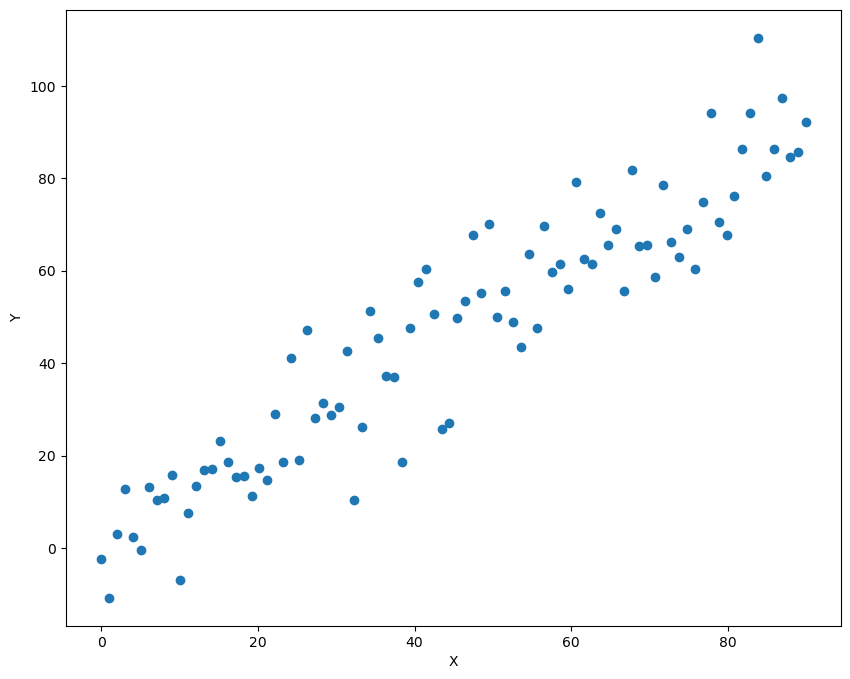

In [10]:
import matplotlib.pyplot as plt # 导入画图的程序包

plt.figure(figsize=(10,8)) # 设定绘制窗口大小为10×8 inch
# 绘制数据，由于x和y都是自动微分变量，因此需要用data获取它们包裹的tensor，并转成NumPy plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'o')
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'o')
plt.xlabel('X') # 添加X轴的标注
plt.ylabel('Y') # 添加Y轴的标注
plt.show() # 画出图形

In [11]:
a = torch.rand(1, requires_grad = True)
b = torch.rand(1, requires_grad = True)

In [12]:
learning_rate = 0.0001

In [13]:
for i in range(1000):
# 计算在当前a、b条件下的模型预测值
    predictions = a.expand_as(x_train) * x_train + b.expand_as(x_train)
    # 将所有训练数据代入模型ax+b，计算每个的预测值。这里的x_train和predictions都是(90, 1)的张量
    # Expand_as的作用是将a、b扩充维度到和x_train一致
    loss = torch.mean((predictions - y_train) ** 2) # 通过与标签数据y比较计算误差，loss是一个标量
    print('loss:', loss)
    loss.backward() # 对损失函数进行梯度反传
    # 利用上一步计算中得到的a的梯度信息更新a中的data数值
    a.data.add_(- learning_rate * a.grad.data)
    # 利用上一步计算中得到的b的梯度信息更新b中的data数值
    b.data.add_(- learning_rate * b.grad.data)
    # 增加这部分代码，清空存储在变量a、b中的梯度信息，以免在backward的过程中反复不停地累加
    a.grad.data.zero_() # 清空a的梯度数值
    b.grad.data.zero_() # 清空b的梯度数值

loss: tensor(2335.2158, grad_fn=<MeanBackward0>)
loss: tensor(567.1738, grad_fn=<MeanBackward0>)
loss: tensor(196.2448, grad_fn=<MeanBackward0>)
loss: tensor(118.4253, grad_fn=<MeanBackward0>)
loss: tensor(102.0990, grad_fn=<MeanBackward0>)
loss: tensor(98.6738, grad_fn=<MeanBackward0>)
loss: tensor(97.9552, grad_fn=<MeanBackward0>)
loss: tensor(97.8045, grad_fn=<MeanBackward0>)
loss: tensor(97.7728, grad_fn=<MeanBackward0>)
loss: tensor(97.7662, grad_fn=<MeanBackward0>)
loss: tensor(97.7648, grad_fn=<MeanBackward0>)
loss: tensor(97.7645, grad_fn=<MeanBackward0>)
loss: tensor(97.7644, grad_fn=<MeanBackward0>)
loss: tensor(97.7644, grad_fn=<MeanBackward0>)
loss: tensor(97.7644, grad_fn=<MeanBackward0>)
loss: tensor(97.7644, grad_fn=<MeanBackward0>)
loss: tensor(97.7644, grad_fn=<MeanBackward0>)
loss: tensor(97.7644, grad_fn=<MeanBackward0>)
loss: tensor(97.7644, grad_fn=<MeanBackward0>)
loss: tensor(97.7644, grad_fn=<MeanBackward0>)
loss: tensor(97.7644, grad_fn=<MeanBackward0>)
loss: t

loss: tensor(97.7630, grad_fn=<MeanBackward0>)
loss: tensor(97.7630, grad_fn=<MeanBackward0>)
loss: tensor(97.7630, grad_fn=<MeanBackward0>)
loss: tensor(97.7630, grad_fn=<MeanBackward0>)
loss: tensor(97.7630, grad_fn=<MeanBackward0>)
loss: tensor(97.7630, grad_fn=<MeanBackward0>)
loss: tensor(97.7630, grad_fn=<MeanBackward0>)
loss: tensor(97.7630, grad_fn=<MeanBackward0>)
loss: tensor(97.7630, grad_fn=<MeanBackward0>)
loss: tensor(97.7630, grad_fn=<MeanBackward0>)
loss: tensor(97.7629, grad_fn=<MeanBackward0>)
loss: tensor(97.7630, grad_fn=<MeanBackward0>)
loss: tensor(97.7630, grad_fn=<MeanBackward0>)
loss: tensor(97.7630, grad_fn=<MeanBackward0>)
loss: tensor(97.7629, grad_fn=<MeanBackward0>)
loss: tensor(97.7629, grad_fn=<MeanBackward0>)
loss: tensor(97.7629, grad_fn=<MeanBackward0>)
loss: tensor(97.7630, grad_fn=<MeanBackward0>)
loss: tensor(97.7629, grad_fn=<MeanBackward0>)
loss: tensor(97.7629, grad_fn=<MeanBackward0>)
loss: tensor(97.7629, grad_fn=<MeanBackward0>)
loss: tensor(

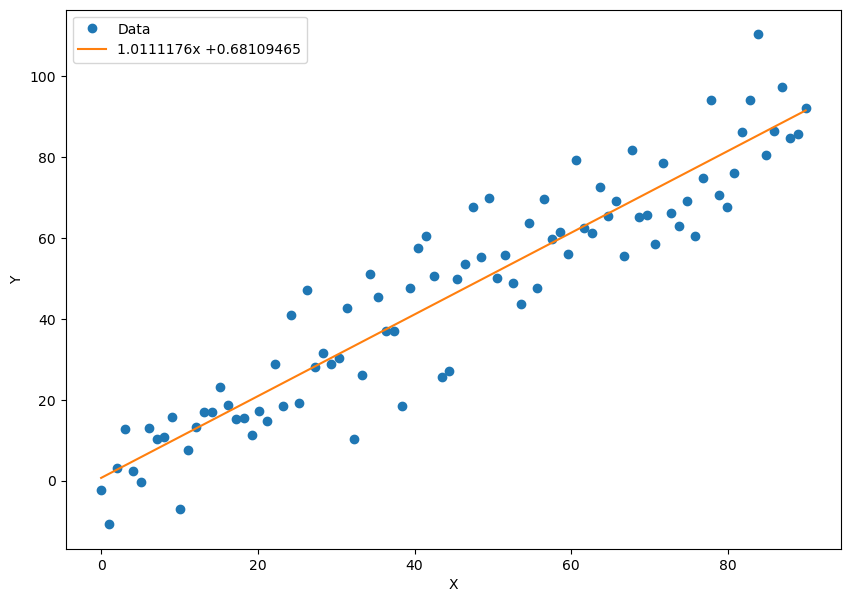

In [14]:
x_data = x_train.data.numpy()  # 将x中的数据转换成NumPy数组
plt.figure(figsize = (10, 7))    # 定义绘图窗口
xplot, = plt.plot(x_data, y_train.data.numpy(), 'o')      # 绘制x和y的散点图
yplot, = plt.plot(x_data, a.data.numpy() * x_data +b.data.numpy())     # 绘制拟合直线图
plt.xlabel('X')      # 给横坐标轴加标注
plt.ylabel('Y')      # 给纵坐标轴加标注
str1 = str(a.data.numpy()[0]) + 'x +' + str(b.data.numpy()[0])      # 将拟合直线的参数a、b显示出来
plt.legend([xplot, yplot],['Data', str1])      # 绘制图例
plt.show() # 绘制图形

## 预测

In [15]:
predictions = a.expand_as(x_test) * x_test + b.expand_as(x_test) # 计算模型的预测结果
predictions # 输出

tensor([ 92.6009,  93.6222,  94.6435,  95.6649,  96.6862,  97.7075,  98.7289,
         99.7502, 100.7715, 101.7928], grad_fn=<AddBackward0>)

In [17]:
import torch

In [23]:
import numpy as np

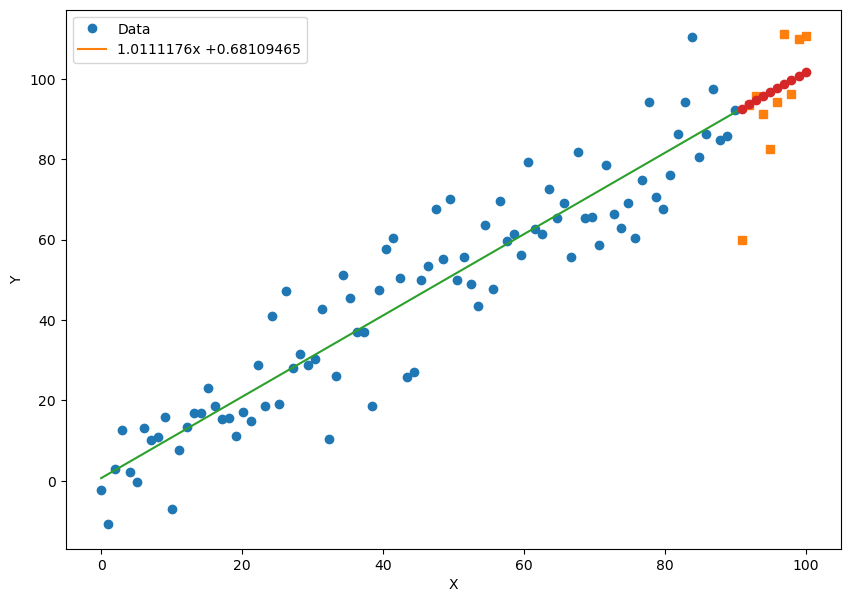

In [24]:
x_data = x_train.data.numpy() # 获得x包裹的数据
x_pred = x_test.data.numpy() # 获得包裹的测试数据的自变量
plt.figure(figsize = (10, 7)) # 设定绘图窗口大小
plt.plot(x_data, y_train.data.numpy(), 'o') # 绘制训练数据
plt.plot(x_pred, y_test.data.numpy(), 's') # 绘制测试数据
x_data = np.r_[x_data, x_test.data.numpy()]
plt.plot(x_data, a.data.numpy() * x_data + b.data.numpy())  # 绘制拟合数据
plt.plot(x_pred, a.data.numpy() * x_pred + b.data.numpy(), 'o') # 绘制预测数据
plt.xlabel('X') # 更改横坐标轴标注
plt.ylabel('Y') # 更改纵坐标轴标注
str1 = str(a.data.numpy()[0]) + 'x +' + str(b.data.numpy()[0]) # 图例信息
plt.legend([xplot, yplot],['Data', str1]) # 绘制图例
plt.show()